### Importacion de dependencias

In [37]:
import torch #nucleo de pytorch
import torch.optim as optim #importamos el modulo de optimizadores de pytorch
from torchvision import datasets, transforms # importamos datasets ya preparados.
import torch.nn as nn  #importamos el modulo de redes neuronales de pytorch
from torch.utils.data import DataLoader #Nos sirve para cargar los datos en porciones y hacer un barajado.

### Datasets.
Primero convertimos la imagen en un formato que PyTorch pueda entender: un tensor con valores entre 0 y 1. Luego, lo reescalamos para que esos valores estén entre -1 y 1, que es mejor para que la red aprenda. Es como decirle al modelo: ‘todo está centrado y balanceado, ahora aprendé’

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### Cargar el dataset de entrenamiento FashionMNIST y el de test

In [39]:
train_dataset = datasets.FashionMNIST(
    root= "./data",
    train=True,
    download=True,
    transform=transform
)

#TODO: Carga el dataset de Test.
test_dataset = datasets.FashionMNIST(
    root = "./data",
    train=False,
    download=True,
    transform=transform
)

### Crea el DataLoader para entrenamiento: agrupa los datos en lotes (batch_size=8) y mezclalos con (shuffle=True)

In [40]:
train_loader = DataLoader(train_dataset, batch_size = 8, shuffle=True)

### Crea  el DataLoader para test: lotes más grandes (1000 imágenes) y sin mezclar (shuffle=False)


In [41]:
test_loader = DataLoader(test_dataset, batch_size = 1000, shuffle=False)

Creación del modelo MLP para procesamiento de imágenes.

Define el modelo MLP

Tamaño de capa Características

Pequeño (64, 128) Menor capacidad, más rápido, menos riesgo de overfitting
Mediano (256, 512) Más representativo, pero necesita más datos y regularización
Grande (1024+) Solo si tenés muchos datos

1. Toma una imagen de 28x28 → la aplana a 784.

2. La pasa por dos capas ocultas (128 y 64 neuronas).

3. Termina con una capa de salida de 10 neuronas (una por clase).

4. Usa una funcion de activacion para activar las capas ocultas.

In [42]:
class FashionMLP(nn.Module):
  def __init__(self):
    super(FashionMLP, self).__init__()
    self.flatter = nn.Flatten()
    self.net = nn.Sequential(

# -------------------- ReLU --------------------

        #PRUEBA CON ReLU
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)

        # ReLU CON MÁS CAPAS
        # nn.Linear(784, 256),
        # nn.ReLU(),
        # nn.Linear(256, 128),
        # nn.ReLU(),
        # nn.Linear(128, 10)

# -------------------- LeakyReLU --------------------

        # PRUEBA CON LeakyReLU
        # nn.Linear(784, 128),
        #nn.LeakyReLU(0.01),
        #nn.Linear(128, 64),
        #nn.LeakyReLU(0.01),
        #nn.Linear(64, 10)

        # LeakyReLU CON MÁS CAPAS
        #nn.Linear(784, 256),
        #nn.LeakyReLU(0.01),
        #nn.Linear(256, 128),
        #nn.LeakyReLU(0.01),
        #nn.Linear(128, 10)


# -------------------- Tanh --------------------

        #PRUEBA CON Tanh
        #nn.Linear(784, 128),
        #nn.Tanh(),
        #nn.Linear(128, 64),
        #nn.Tanh(),
        #nn.Linear(64, 10)

        #Tanh CON MÁS CAPAS
        #nn.Linear(784, 256),
        #nn.Tanh(),
        #nn.Linear(256, 128),
        #nn.Tanh(),
        #nn.Linear(128, 10)

    )
  def forward(self, x):
      x = self.flatter(x)
      return self.net(x)

Declaramos una variable llamada device para utilizarla posteriormente.
Declaramos la variable model que tendrá la clase MLP y le pasamos device para que utilice CUDA



In [43]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FashionMLP().to(device)

Declaramos la funcion de perdida y el optimizador.

La función de pérdida nos dice qué tan mal se está comportando la red. Si el valor es alto, significa que la predicción está lejos de la clase correcta.

El optimizador define el algoritmo de optimización que ajustará los pesos del modelo. Usa el optimizador Adam, que es más avanzado que el clásico SGD. Como parametro le pasamos model.parameters() esto pasa todos los pesos entrenables del modelo. lr=0.001 es la tasa de aprendizaje (learning rate).

Learning rate: Es un número que controla cuánto cambian los pesos del modelo cada vez que actualizamos (cada batch o paso de entrenamiento).

In [44]:
#TODO: Declara la variable criterion y una función de perdida a utilizar.
criterion = nn.CrossEntropyLoss()
#TODO: Declara una variable optimizer y asignale un optimizador, por ejemplo: SGD
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Entrenamiento

Cuando creamos un modelo utilizando PyTorch, el entrenamiento lo hacemos de forma manual.

Declaramos las epochs (épocas) o interacciones que hará la red neuronal sobre nuestros datos.


In [45]:
epochs = 5

loss_list = []
acc_list = []

for epoch in range(epochs):
  model.train()
  total_loss = 0
  correct = 0
  total = 0

  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    _, predicted = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  avg_loss = total_loss / len(train_loader)
  accuracy = 100 * correct / total

  loss_list.append(avg_loss)
  acc_list.append(accuracy)

  print(f"Época {epoch + 1} / {epochs}, Pérdida: {avg_loss:.4f}, Precisión: {accuracy:.2f}%")


Época 1 / 5, Pérdida: 0.5339, Precisión: 80.55%
Época 2 / 5, Pérdida: 0.4588, Precisión: 83.14%
Época 3 / 5, Pérdida: 0.4423, Precisión: 83.93%
Época 4 / 5, Pérdida: 0.4288, Precisión: 84.50%
Época 5 / 5, Pérdida: 0.4182, Precisión: 84.91%


### Grafico de la perdida y accuracy

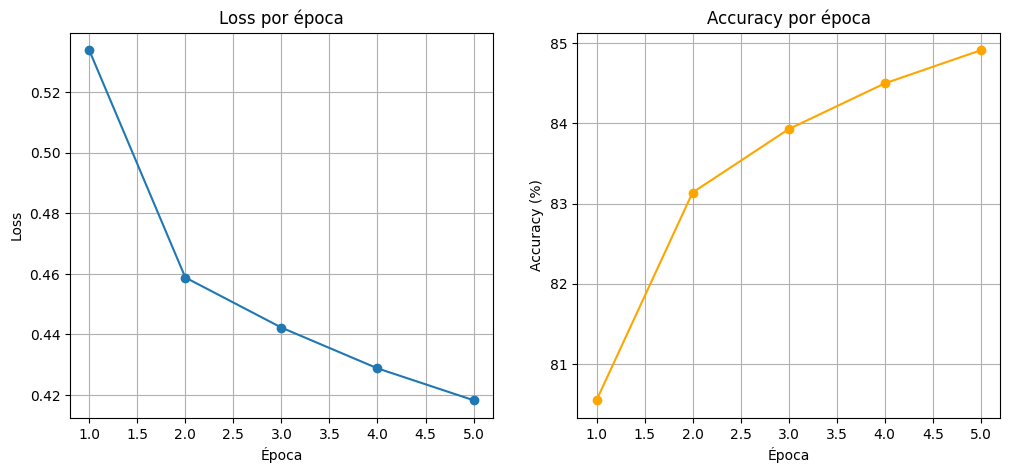

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))  # definimos el tamaño de la figura

# Pérdida
plt.subplot(1,2,1)                     # primera gráfica (izquierda)
plt.plot(range(1, epochs+1), loss_list, marker='o')  # graficamos loss por época
plt.title('Loss por época')            # título de la gráfica
plt.xlabel('Época')                    # etiqueta eje X
plt.ylabel('Loss')                     # etiqueta eje Y
plt.grid(True)                         # mostramos cuadrícula

# Accuracy
plt.subplot(1,2,2)                     # segunda gráfica (derecha)
plt.plot(range(1, epochs+1), acc_list, marker='o', color='orange')  # graficamos accuracy
plt.title('Accuracy por época')        # título de la gráfica
plt.xlabel('Época')                    # etiqueta eje X
plt.ylabel('Accuracy (%)')             # etiqueta eje Y
plt.grid(True)                         # mostramos cuadrícula

plt.show()                             # mostramos la figura completa


MNIST FASHIONS posee clases para cada numero

    "Remera/Top",   # 0
    "Pantalón",     # 1
    "Suéter",       # 2
    "Vestido",      # 3
    "Abrigo",       # 4
    "Sandalia",     # 5
    "Camisa",       # 6
    "Zapatilla",    # 7
    "Bolso",        # 8
    "Botín"         # 9




In [47]:
class_names = [
    "Remera/Top",    # 0
    "Pantalón",     # 1
    "Suéter",       # 2
    "Vestido",      # 3
    "Abrigo",       # 4
    "Sandalia",     # 5
    "Camisa",       # 6
    "Zapatilla",    # 7
    "Bolso",        # 8
    "Botín"         # 9
]

### Prediccion

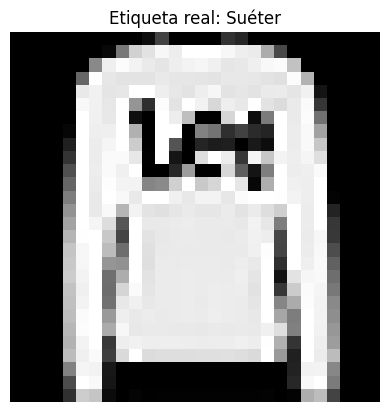

tensor([[ 1.2817, -4.3592,  7.3097,  0.4359,  4.4891, -6.1712,  4.7251, -9.2778,
         -1.2328, -5.6160]], device='cuda:0')
tensor([2], device='cuda:0')
Predicción del modelo: Suéter


In [48]:
i= 1
# Tomamos una sola imagen del test
images, labels = next(iter(test_loader))
image = images[i].to(device).unsqueeze(0)  # Agregamos dimensión de batch
label = labels[i]

# Mostramos la imagen en una escala de grises
plt.imshow(images[i].squeeze(), cmap='gray')
plt.title(f'Etiqueta real: {class_names[label]}')
plt.axis('off')
plt.show()

# ponemos el modelo en modo evaluacion
model.eval()
#hacemos la prediccion
with torch.no_grad():
    output = model(image)
    print(output)
    _, predicted = torch.max(output, 1)
    print(predicted)
    print(f'Predicción del modelo: {class_names[predicted.item()]}')